<a href="https://colab.research.google.com/github/Ouvryy/69LaTrik/blob/main/Linear_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

In [26]:
def get_device():
    """Return GPU device if available, or fall back to CPU"""

    return torch.device(
        "cuda"
        if torch.cuda.is_available()
        else "mps"
        if torch.backends.mps.is_available()
        else "cpu"
    )


device = get_device()

In [27]:
device = get_device()
print(f"PyTorch {torch.__version__}, using {device} device")

PyTorch 2.6.0+cu124, using cpu device


In [28]:
# Hyperparameters
n_epochs = 60  # Number of training iterations on the whole dataset
learning_rate = 0.001  # Rate of parameter change during gradient descent

In [29]:
# Toy dataset: inputs and expected results
inputs = np.array(
[
    [3.3],  [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182],
    [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1],
],
dtype=np.float32,
)
targets = np.array(
[
    [1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596],
    [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3],
],
dtype=np.float32,
)

print(f"Inputs: {inputs.shape}. targets: {targets.shape}")

Inputs: (15, 1). targets: (15, 1)


In [30]:
# Convert dataset to PyTorch tensors and put them on GPU memory (if available)
x_train = torch.from_numpy(inputs).to(device)
y_train = torch.from_numpy(targets).to(device)

In [31]:
# Create a Linear Regression model and put it on GPU memory
model = nn.Linear(in_features=1, out_features=1).to(device)

In [32]:
def get_parameter_count(model):
    """Return the number of trainable parameters for a PyTorch model"""

    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Print model architecture
print(model)

# Compute and print parameter count
n_params = get_parameter_count(model)
print(f"Model has {n_params} trainable parameters")
# Linear layers have (in_features + 1) * out_features parameters
assert n_params == 2

Linear(in_features=1, out_features=1, bias=True)
Model has 2 trainable parameters


In [33]:
# Use Mean Squared Error loss
criterion = nn.MSELoss()

In [34]:
# Set the model to training mode - important for batch normalization and dropout layers.
# Unnecessary here but added for best practices
model.train()

# Train the model
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(x_train)

    # Compute loss value
    loss = criterion(y_pred, y_train)

    # Reset the gradients to zero before running the backward pass.
    # Avoids accumulating gradients between GD steps
    model.zero_grad()

    # Compute gradients
    loss.backward()

    # no_grad() avoids tracking operations history when gradients computation is not needed
    with torch.no_grad():
        # Manual gradient descent step: update the weights in the opposite direction of their gradient
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Print training progression
    if (epoch + 1) % 5 == 0:
        print(
            f"Epoch [{(epoch + 1):3}/{n_epochs:3}] finished. Loss: {loss.item():.5f}"
        )

Epoch [  5/ 50] finished. Loss: 2.98860
Epoch [ 10/ 50] finished. Loss: 1.48246
Epoch [ 15/ 50] finished. Loss: 0.87185
Epoch [ 20/ 50] finished. Loss: 0.62405
Epoch [ 25/ 50] finished. Loss: 0.52323
Epoch [ 30/ 50] finished. Loss: 0.48194
Epoch [ 35/ 50] finished. Loss: 0.46478
Epoch [ 40/ 50] finished. Loss: 0.45740
Epoch [ 45/ 50] finished. Loss: 0.45398
Epoch [ 50/ 50] finished. Loss: 0.45216


In [36]:
def plot_training_results(model, x, y, title):
    """
    Plot data and model predictions.

    Args:
        model (torch.nn.Module): Trained PyTorch model
        x (torch.Tensor): Input features of shape (n_samples, 2)
        y (torch.Tensor): Labels of shape (n_samples,)
        title (str): Plot title
    """
    # Set the model to evaluation mode - important for batch normalization and dropout layers.
    # Unnecessary here but added for best practices
    model.eval()

    # Compute model results on training data, and convert them to a NumPy array
    y_pred = model(x).detach().cpu().numpy()

    # Convert inputs and targets to NumPy arrays
    x_cpu = x.detach().cpu().numpy()
    y_cpu = y.detach().cpu().numpy()

    # Plot the training results
    plt.plot(x_cpu, y_cpu, "ro", label="Original data")
    plt.plot(x_cpu, y_pred, label="Fitted line")
    plt.legend()
    plt.title(title)

    return plt.gcf()

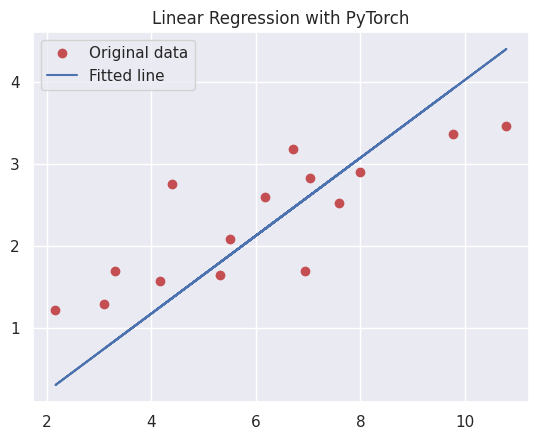

In [37]:
# Improve plots appearance
sns.set_theme()

_ = plot_training_results(
    model=model, x=x_train, y=y_train, title="Linear Regression with PyTorch"
)
plt.show()